# Building models with Keras

Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development. Building a very complex deep learning network can be achieved with only few lines of code.

In [1]:
# Suppress the tensorflow warning messages if not using GPU

# import os
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
# Imnport the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

import warnings
warnings.simplefilter('ignore', FutureWarning)

## Regression Model

### DATA

The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:

* Cement
* Blast furnace slag
* Fly ash
* Water
* Superplasticizer
* Coarse aggregate
* Fine aggregate

In [3]:
filepath='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
concrete_data = pd.read_csv(filepath)

concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concrete_data.shape

(1030, 9)

In [5]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete_data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [7]:
# Split data into predictors and target

concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [8]:
# Normalize it by substracting the mean and dividing by the standard deviation.

predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [9]:
# Save the number of predictors to n_cols
# we will need this number when building our network.

n_cols = predictors_norm.shape[1] # number of predictors
n_cols

8

In [10]:
# Import Keras Packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

### Build a Neural Network

In [11]:
# A function that defines our model with 3 hidden layers, each with 50 units.

def regression_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [12]:
# Build the model

model = regression_model()

In [13]:
# Training

history = model.fit(predictors_norm, target, validation_split=0.15, epochs=100, verbose=0)

###  Model Assessment

In [14]:
# Evaluate the model on the training data (and validation split)

print("\n--- Model Evaluation ---")
train_loss, train_metric = model.evaluate(predictors_norm, target, verbose=0)
print(f"Training Loss (MSE): {train_loss:.4f}")
print(f"Training Metric (MAE): {train_metric:.4f}")


--- Model Evaluation ---
Training Loss (MSE): 20.4380
Training Metric (MAE): 3.3707



--- Visualizing Training History ---


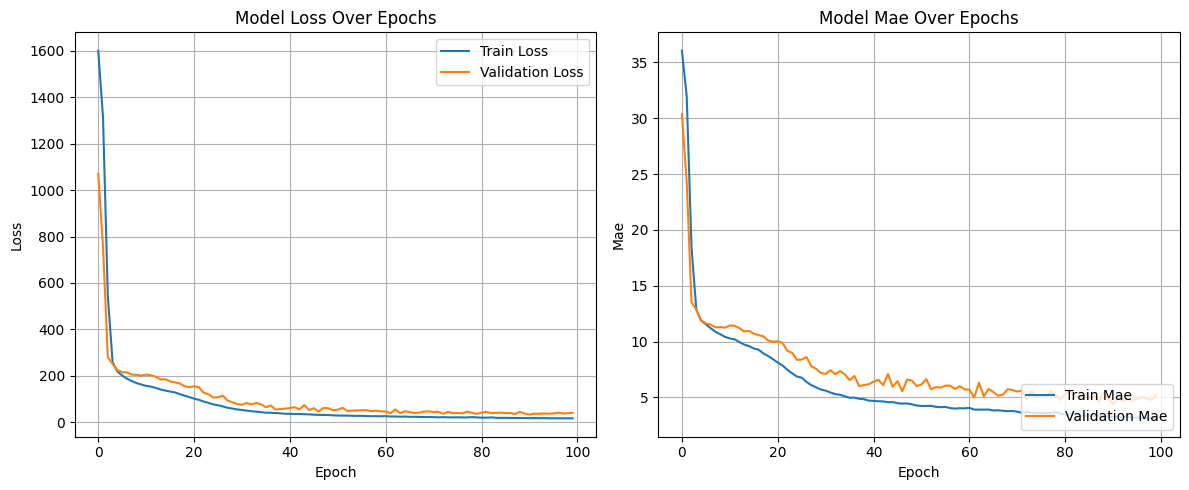

In [15]:
# Visualize Training History

print("\n--- Visualizing Training History ---")

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

# Plot training & validation metric values
# Replace 'accuracy' with the actual metric name you used in model.compile.
plt.subplot(1, 2, 2)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    metric_name = 'Accuracy'
elif 'mse' in history.history: # Example for regression
    plt.plot(history.history['mse'], label='Train MSE')
    if 'val_mse' in history.history:
        plt.plot(history.history['val_mse'], label='Validation MSE')
    metric_name = 'Mean Squared Error (MSE)'
else: # Fallback if specific metric not found
    metric_keys = [key for key in history.history.keys() if 'val_' not in key and key != 'loss']
    if metric_keys:
        metric_key = metric_keys[0] # Take the first found metric
        plt.plot(history.history[metric_key], label=f'Train {metric_key.replace("_", " ").title()}')
        if f'val_{metric_key}' in history.history:
            plt.plot(history.history[f'val_{metric_key}'], label=f'Validation {metric_key.replace("_", " ").title()}')
        metric_name = metric_key.replace("_", " ").title()
    else:
        print("No other metrics found in history to plot besides loss.")
        metric_name = "Metric" # Placeholder

plt.title(f'Model {metric_name} Over Epochs')
plt.ylabel(metric_name)
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
# Separate Data into Training and Validation Splits
# Keras's validation_split takes the *last* fraction of the data for validation.
num_samples = predictors_norm.shape[0]
num_val_samples = int(num_samples * 0.15)

# Splitting features
train_predictors = predictors_norm[:-num_val_samples]
val_predictors = predictors_norm[-num_val_samples:]

# Splitting targets
train_target = target[:-num_val_samples]
val_target = target[-num_val_samples:]

print(f"Total samples: {num_samples}")
print(f"Training samples: {train_predictors.shape[0]}")
print(f"Validation samples: {val_predictors.shape[0]}")


# Get Predictions for Training and Validation Data
print("\nGetting predictions for training data...")
train_predictions = model.predict(train_predictors, verbose=0)
print("Getting predictions for validation data...")
val_predictions = model.predict(val_predictors, verbose=0)

# Reshape predictions and targets to be 1D if they are (N, 1)
# This helps matplotlib with plotting and avoids potential warnings.
if train_predictions.shape[-1] == 1:
    train_predictions = train_predictions.flatten()
if val_predictions.shape[-1] == 1:
    val_predictions = val_predictions.flatten()

# Ensure targets are also flattened if they are (N, 1)
if train_target.ndim > 1 and train_target.shape[-1] == 1:
    train_target = train_target.flatten()
if val_target.ndim > 1 and val_target.shape[-1] == 1:
    val_target = val_target.flatten()

Total samples: 1030
Training samples: 876
Validation samples: 154

Getting predictions for training data...
Getting predictions for validation data...



Creating side-by-side plots for predictions vs. actual target...


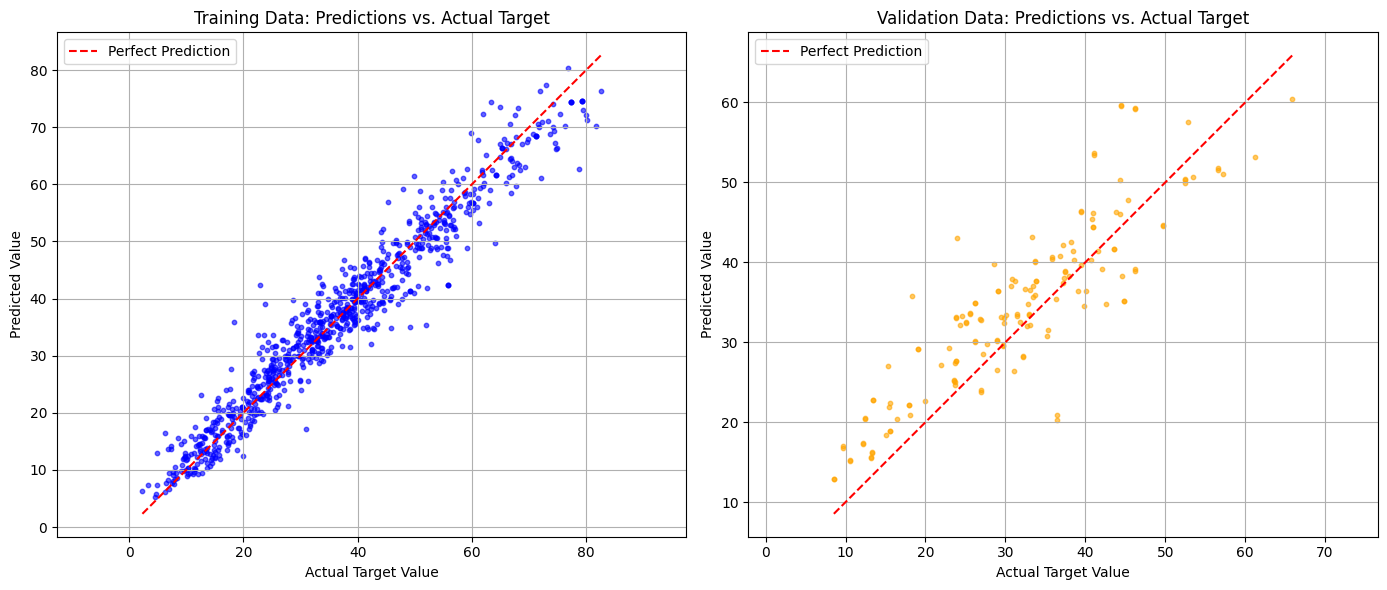

Plots generated successfully.


In [17]:
# Create Side-by-Side Plots ---
print("\nCreating side-by-side plots for predictions vs. actual target...")

plt.figure(figsize=(14, 6)) # Adjust figure size for better readability

# --- Plot for Training Data ---
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.scatter(train_target, train_predictions, alpha=0.6, s=10, color='blue')
plt.title('Training Data: Predictions vs. Actual Target')
plt.xlabel('Actual Target Value')
plt.ylabel('Predicted Value')
plt.grid(True)

# Add a diagonal line representing perfect predictions
# Calculate min/max values for the perfect prediction line to cover the plot range
all_vals_train = np.concatenate([train_target, train_predictions])
min_val_train = all_vals_train.min()
max_val_train = all_vals_train.max()
plt.plot([min_val_train, max_val_train], [min_val_train, max_val_train], 'r--', label='Perfect Prediction')
plt.legend()
plt.axis('equal') # Ensures that the scale of x and y axes are the same for unbiased visualization

# --- Plot for Validation Data ---
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.scatter(val_target, val_predictions, alpha=0.6, s=10, color='orange')
plt.title('Validation Data: Predictions vs. Actual Target')
plt.xlabel('Actual Target Value')
plt.ylabel('Predicted Value')
plt.grid(True)

# Add a diagonal line representing perfect predictions
all_vals_val = np.concatenate([val_target, val_predictions])
min_val_val = all_vals_val.min()
max_val_val = all_vals_val.max()
plt.plot([min_val_val, max_val_val], [min_val_val, max_val_val], 'r--', label='Perfect Prediction')
plt.legend()
plt.axis('equal') # Ensures that the scale of x and y axes are the same for unbiased visualization

plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.show()

print("Plots generated successfully.")

## Classification Model

In [44]:
# Import the libraries.

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

### DATA

We will use the popular MNIST dataset, a dataset of images.

The Modified National Institute of Standards and Technology database (**MNIST**) , is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

The Keras library conveniently includes the MNIST dataset as part of its API.

You can check other datasets within the Keras library [here](https://keras.io/datasets/).


In [20]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
# Let's confirm the number of images in each set.
# According to the dataset's documentation, we should have
# 60000 images in X_train and 10000 images in the X_test,
# each image is 28 pixels by 28 pixels.

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)


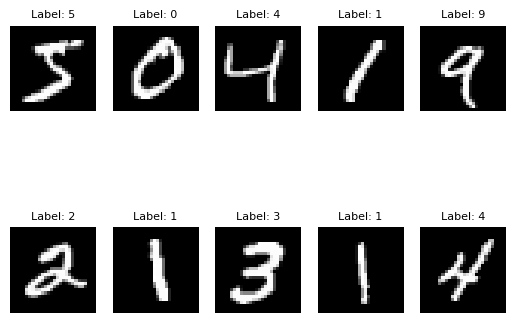

In [30]:
# Visualize some imags in the training set with Matplotlib's scripting layer.

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}", fontsize=8) # <--- Here's the change
    plt.axis('off') # Hide axes for cleaner image display

In [31]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [32]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [33]:
# We need to divide our target variable into categories.
# We can use the to_categorical function from the Keras Utilities package.

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


### Build a Neural Network

In [34]:
# define classification model
def classification_model():
    # create model

    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Train and Test the Network

In [35]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 23s - 13ms/step - accuracy: 0.9438 - loss: 0.1858 - val_accuracy: 0.9688 - val_loss: 0.0954
Epoch 2/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9760 - loss: 0.0784 - val_accuracy: 0.9737 - val_loss: 0.0850
Epoch 3/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9832 - loss: 0.0533 - val_accuracy: 0.9795 - val_loss: 0.0716
Epoch 4/10
1875/1875 - 25s - 13ms/step - accuracy: 0.9876 - loss: 0.0391 - val_accuracy: 0.9787 - val_loss: 0.0681
Epoch 5/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9789 - val_loss: 0.0744
Epoch 6/10
1875/1875 - 26s - 14ms/step - accuracy: 0.9918 - loss: 0.0252 - val_accuracy: 0.9767 - val_loss: 0.0921
Epoch 7/10
1875/1875 - 37s - 20ms/step - accuracy: 0.9927 - loss: 0.0220 - val_accuracy: 0.9753 - val_loss: 0.1073
Epoch 8/10
1875/1875 - 39s - 21ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9790 - val_loss: 0.0858
Epoch 9/10
1875/1875 - 43s - 23ms/step - accuracy: 0.9934 - loss: 0.0195 - val_a

In [36]:
# The accuracy and the corresponding error.

print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9775000214576721% 
 Error: 0.02249997854232788


In [37]:
# We can save our model after training.

model.save('classification_model.keras')

In [39]:
# When we are ready to use our model again, we use the
# load_model function from keras.saving.

pretrained_model = keras.saving.load_model('classification_model.keras')

### Another Neural Net

In [40]:
# A neural network model with 6 dense layers and compare its accuracy

def classification_model_6layers():
    """
    Defines and compiles a Keras Sequential model with 6 Dense layers
    for classification.
    """
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

   # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model_6layers = classification_model_6layers()
model_6layers.summary() # Print a summary of the model architecture

# fit the model
history_6layers = model_6layers.fit(X_train,
                                    y_train,
                                    validation_data=(X_test, y_test),
                                    epochs=10,
                                    verbose=2)

# evaluate the model
scores_6layers = model_6layers.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {scores_6layers[0]:.4f}')
print(f'Test Accuracy: {scores_6layers[1]*100:.2f}%\n')

print('Accuracy_3_layers: {}% \n Accuracy_6_layers: {}'.format(scores[1], scores_6layers[1]))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,250 (2.77 MB)

 Trainable params: 725,250 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 - 28s - 15ms/step - accuracy: 0.9329 - loss: 0.2207 - val_accuracy: 0.9551 - val_loss: 0.1512
Epoch 2/10
1875/1875 - 27s - 15ms/step - accuracy: 0.9698 - loss: 0.1013 - val_accuracy: 0.9691 - val_loss: 0.1019
Epoch 3/10
1875/1875 - 26s - 14ms/step - accuracy: 0.9786 - loss: 0.0709 - val_accuracy: 0.9757 - val_loss: 0.0870
Epoch 4/10
1875/1875 - 38s - 20ms/step - accuracy: 0.9830 - loss: 0.0578 - val_accuracy: 0.9693 - val_loss: 0.1226
Epoch 5/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9864 - loss: 0.0467 - val_accuracy: 0.9803 - val_loss: 0.0734
Epoch 6/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9890 - loss: 0.0374 - val_accuracy: 0.9783 - val_loss: 0.0849
Epoch 7/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9896 - loss: 0.0359 - val_accuracy: 0.9811 - val_loss: 0.0763
Epoch 8/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9915 - loss: 0.0293 - val_accuracy: 0.9791 - val_loss: 0.0910
Epoch 9/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9920 - loss: 0.0266 - val_a


Evaluating the model on the test data...
Test Loss: 0.1066
Test Accuracy: 97.79%



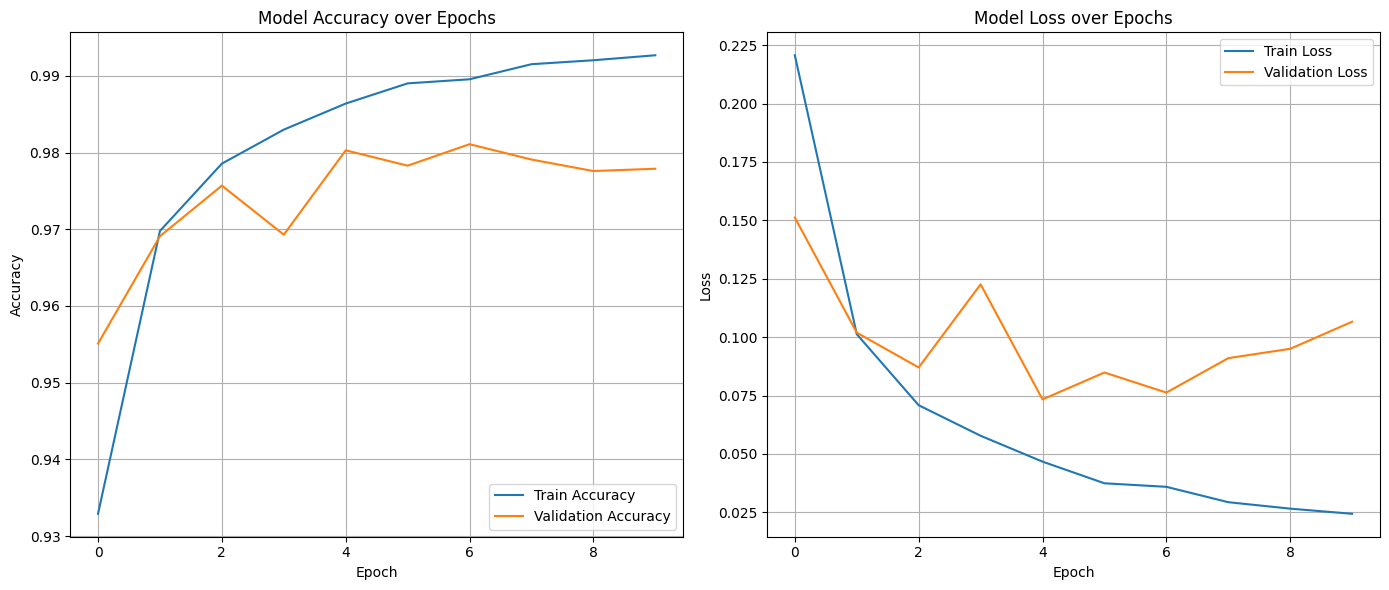

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


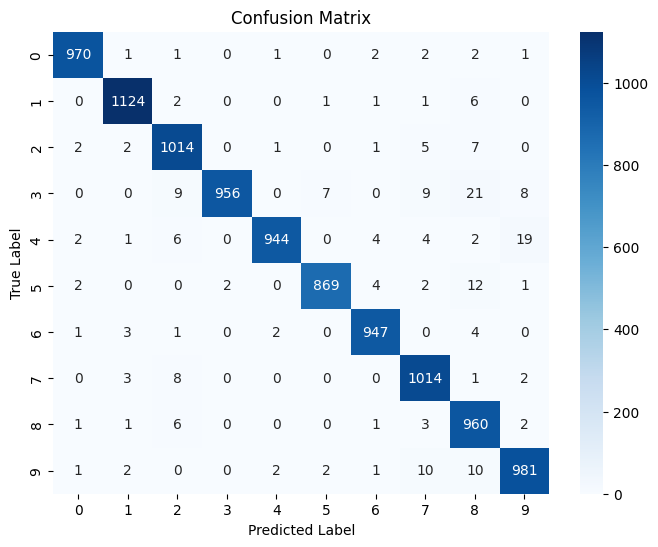


Model assessment complete.


In [45]:
# Evaluate the Model

print("\nEvaluating the model on the test data...")
scores_6layers = model_6layers.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {scores_6layers[0]:.4f}')
print(f'Test Accuracy: {scores_6layers[1]*100:.2f}%\n')

# Visualize Training History
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history_6layers.history['accuracy'], label='Train Accuracy')
plt.plot(history_6layers.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history_6layers.history['loss'], label='Train Loss')
plt.plot(history_6layers.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# Generate and Plot Confusion Matrix

# Get predictions for the test set
y_pred_probs = model_6layers.predict(X_test)
# Convert probabilities to predicted class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)
# Convert one-hot encoded y_test back to original labels
y_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
# Use seaborn for a visually appealing confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nModel assessment complete.")